In [1]:
import glob
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def load_dataset(validation=False):
    if (validation):
        filelist_1 = glob.glob('test/1/*.jpg')
        x_test_1 = np.array([np.array(Image.open(fname)) for fname in filelist_1])
        y_test_1 = np.ones((500,1))
        flatten = x_test_1.shape[1]*x_test_1.shape[2]
        x_test_1 = x_test_1.reshape(x_test_1.shape[0], flatten)
        filelist_0 = glob.glob('test/0/*.jpg')
        x_test_0 = np.array([np.array(Image.open(fname)) for fname in filelist_0])
        y_test_0 = np.ones((500,1))
        flatten = x_test_0.shape[1]*x_test_0.shape[2]
        x_test_0 = x_test_0.reshape(x_test_0.shape[0], flatten)
        x_test = np.concatenate((x_test_0,x_test_1))
        y_test = np.concatenate((y_test_0,y_test_1))
        return x_test,y_test
    else:
        filelist_1 = glob.glob('train/1/*.jpg')
        x_train_1 = np.array([np.array(Image.open(fname)) for fname in filelist_1])
        y_train_1 = np.ones((500,1))
        flatten = x_train_1.shape[1]*x_train_1.shape[2]
        x_train_1 = x_train_1.reshape(x_train_1.shape[0], flatten)
        filelist_0 = glob.glob('train/0/*.jpg')
        x_train_0 = np.array([np.array(Image.open(fname)) for fname in filelist_0])
        y_train_0 = np.zeros((500,1))
        flatten = x_train_0.shape[1]*x_train_0.shape[2]
        x_train_0 = x_train_0.reshape(x_train_0.shape[0], flatten)
        x_train = np.concatenate((x_train_0,x_train_1))
        y_train = np.concatenate((y_train_0,y_train_1))
        return x_train, y_train

In [3]:
def normalize_data(X):
    sc = StandardScaler()
    return sc.fit_transform(X)

In [4]:
#Function for initializing random weights
def init_weights(X):
    W = np.random.rand(1,X.shape[1])*0.01
    b = 0
    return W, b

In [5]:
def linear_forward(X,W,b):
    Z = np.dot(X,W.T) + b
    return Z

In [6]:
def compute_cost(Y_hat,Y):
    m = Y.shape[0]
    cost = (1/m)*np.sum((Y-Y_hat)**2)
    return cost

In [7]:
def compute_grad(X,Y_hat,Y):
    m = Y.shape[0]
    dW = (-1/m)*(np.dot((Y-Y_hat).T,X))
    db = (-1/m)*np.sum((Y-Y_hat))
    return dW,db    

In [8]:
def update_parameters(W,b,dW,db,eta):
    W -= eta*dW
    b -= eta*db
    return W,b

In [9]:
def validation(W,b,x_test):
    yhat = step(linear_forward(x_test,W,b))
    return yhat

In [10]:
def step(z):
    return 1 * (z > 0)

In [11]:
def main(X,Y):
    W ,b = init_weights(X)
    l_cost = []
    num_iterations =1000
    eta = 0.001 
    for i in range(1,num_iterations):
        Y_hat = linear_forward(X,W,b)
        cost_ = compute_cost(Y_hat,Y)
        l_cost.append(cost_)
        if i%100==0:
            print ("cost is {} ".format(cost_))
        
        dW, db = compute_grad(X,Y_hat,Y)
        W, b = update_parameters(W,b,dW,db,eta)
    return W,b,l_cost

**Training**

In [12]:
#load_dataset
x_train, y_train = load_dataset()
x_train = normalize_data(x_train)

/home/stan/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
final_W, final_b , l_cost= main(x_train,y_train)

cost is 0.2543628169736468 
cost is 0.20612900156540512 
cost is 0.17131016307041394 
cost is 0.1436903689398724 
cost is 0.12140517834523905 
cost is 0.10329275718415776 
cost is 0.08851047776897236 
cost is 0.07641244167110837 
cost is 0.066490259202223 


**COST CURVE**

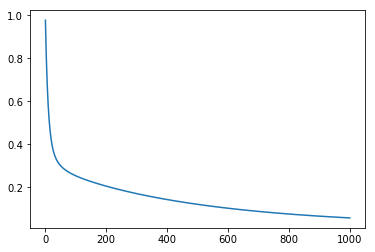

In [14]:
%matplotlib inline
plt.plot(range(1,1000),l_cost)
plt.show()

**Validation**

In [18]:
x_test, y_test = load_dataset(validation=True)
predictions = validation(final_W,final_b,x_test)
acc = np.mean(y_test==predictions)

In [19]:
print ("Accuracy is {}%".format(acc*100))

Accuracy is 48.199999999999996%
